In [2]:
import numpy as np
import xarray as xr

from src.simulator import simulate_trajectories

In [3]:
import numpy as np
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [25]:
num_simulations = 1000
#sampling from prior #beta_e ~ U(0,5), theta_e ~ U(45,90), beta_v ~ U(0,1) 
thetas = np.random.uniform([0,45,0],[5,90,0.01],size=(num_simulations,3)) 


In [26]:
thetas

array([[8.43865856e-01, 5.94956840e+01, 2.69837331e-03],
       [1.77055368e+00, 6.67713005e+01, 3.59040619e-03],
       [1.92509041e+00, 6.04540210e+01, 9.82370255e-03],
       ...,
       [6.76390865e-01, 5.06024826e+01, 7.33720057e-03],
       [7.09117900e-02, 5.56928832e+01, 6.70554109e-04],
       [9.14167646e-02, 7.99316995e+01, 8.49142960e-03]], shape=(1000, 3))

In [27]:
# traj_ds = xarray.open_dataset('data/observed_traj_subset.nc')
traj_ds = xarray.open_dataset('data/traj_for_sim.nc')
traj_ds

<xarray.Dataset> Size: 15kB
Dimensions:      (index: 120)
Coordinates:
  * index        (index) int64 960B 40018 40019 40020 ... 40135 40136 40137
Data variables:
    deploy_time  (index) datetime64[ns] 960B ...
    drifter_id   (index) <U15 7kB ...
    traj_id      (index) int64 960B ...
    time         (index) datetime64[ns] 960B ...
    lat          (index) float64 960B ...
    lon          (index) float64 960B ...
    u            (index) float64 960B ...
    v            (index) float64 960B ...

Text(0.5, 1.0, 'Trajectory x0')

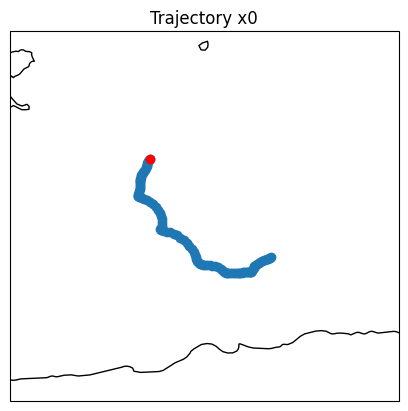

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())

im = ax.scatter(
    traj_ds.lon,
    traj_ds.lat,
)
ax.scatter(
    traj_ds.lon[0],
    traj_ds.lat[0],
    color='red',
)

ax.coastlines()
ax.set_extent([traj_ds.lon.min()-1, traj_ds.lon.max()+1, traj_ds.lat.min()-1, traj_ds.lat.max()+1])
plt.title(f'Trajectory x0')

# for i in traj_ds.traj:
#     fig = plt.figure()
#     ax = fig.add_subplot(projection=ccrs.PlateCarree())

#     im = ax.scatter(
#         traj_ds.lon[i],
#         traj_ds.lat[i],
#     )

#     ax.coastlines()
#     plt.title(f'Trajectory {i.values}')
#     if i>10:
#         break

In [29]:

#Initial point for simulator
x0 = np.asarray([traj_ds["lon"][0].values, traj_ds["lat"][0].values])

#Fields datasets for simulator
currents_ds = xr.open_dataset("data/currents_for_sim.nc")
wind_ds = xr.open_dataset("data/wind_for_sim.nc")

sim_trajectories = simulate_trajectories(
    currents_ds, wind_ds, x0, traj_ds["time"].values, thetas
)  # (N, T, 2)

### Prior Check

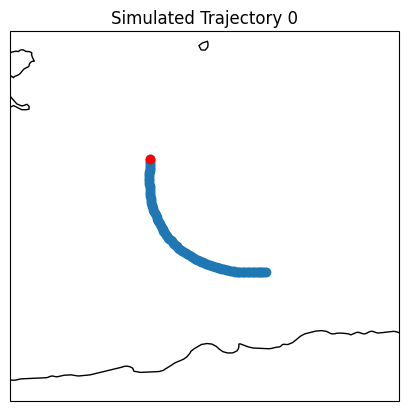

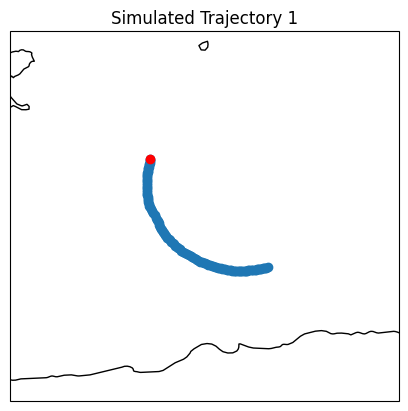

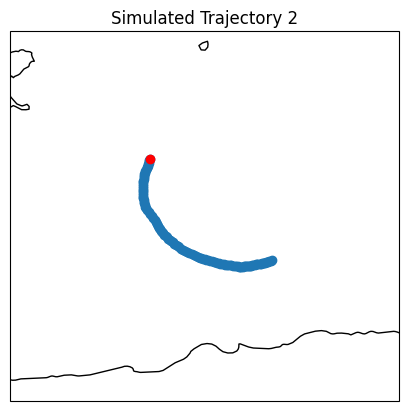

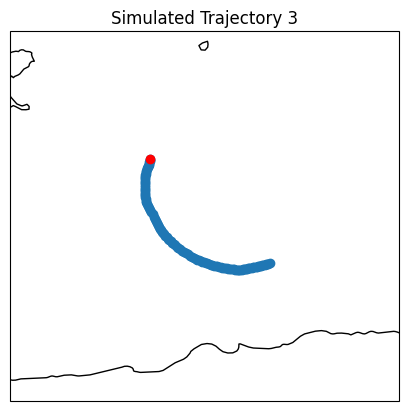

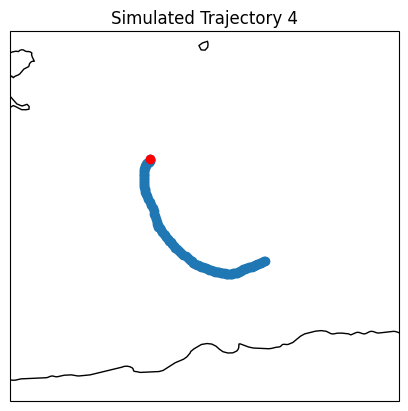

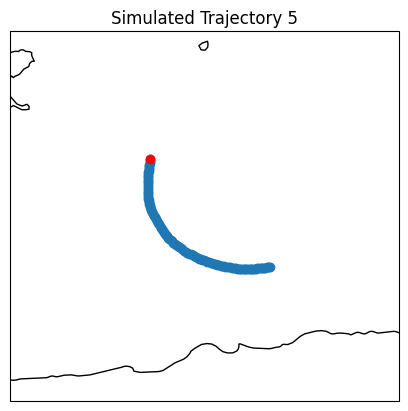

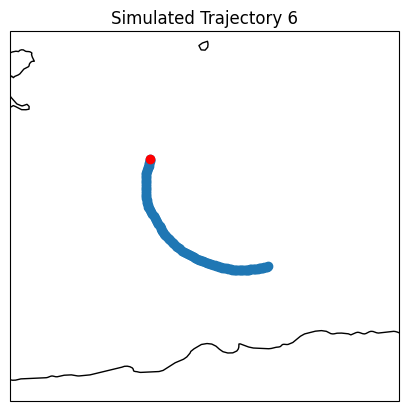

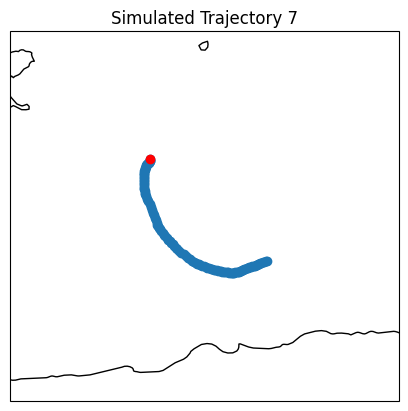

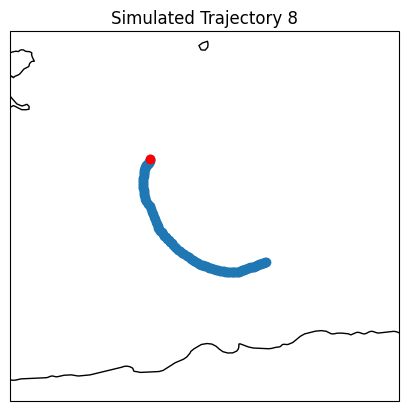

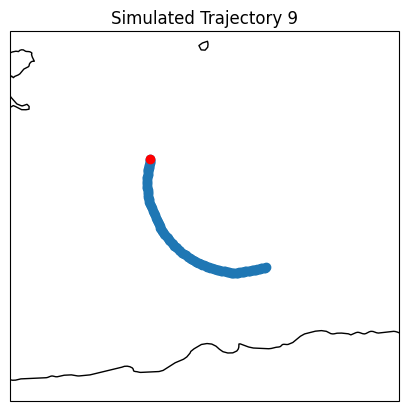

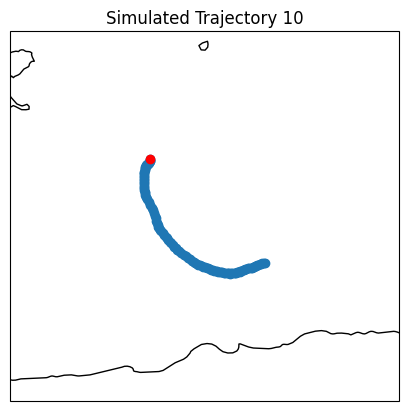

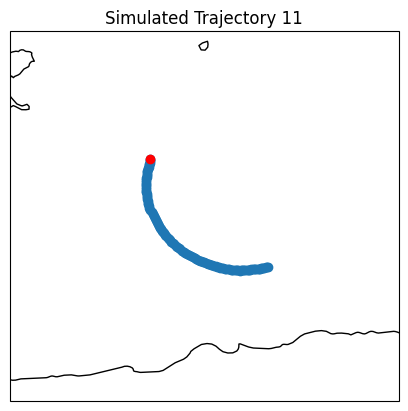

In [30]:
for i in range(0,sim_trajectories.shape[0]):
    fig = plt.figure()
    ax = fig.add_subplot(projection=ccrs.PlateCarree())

    im = ax.scatter(
        sim_trajectories[i,:,0],
        sim_trajectories[i,:,1],
    )
    ax.scatter(
        sim_trajectories[i,0,0],
        sim_trajectories[i,0,1],
        color='red',
    )

    ax.set_extent([traj_ds.lon.min()-1, traj_ds.lon.max()+1, traj_ds.lat.min()-1, traj_ds.lat.max()+1])

    ax.coastlines()
    plt.title(f'Simulated Trajectory {i}')
    if i>10:
        break

In [31]:
sim_trajectories

Array([[[ 2.5270228 , 38.2630488 ],
        [ 2.52817405, 38.2522816 ],
        [ 2.52900095, 38.24111337],
        ...,
        [ 3.41923228, 37.37764581],
        [ 3.42844514, 37.37857353],
        [ 3.4376379 , 37.37952947]],

       [[ 2.5270228 , 38.2630488 ],
        [ 2.52761913, 38.25354081],
        [ 2.52763109, 38.24351136],
        ...,
        [ 3.43164278, 37.40862126],
        [ 3.44149949, 37.41067306],
        [ 3.45146972, 37.41264636]],

       [[ 2.5270228 , 38.2630488 ],
        [ 2.52574043, 38.25371341],
        [ 2.52394257, 38.24354108],
        ...,
        [ 3.46624114, 37.46191938],
        [ 3.47596076, 37.46491868],
        [ 3.48604241, 37.46777749]],

       ...,

       [[ 2.5270228 , 38.2630488 ],
        [ 2.52706401, 38.2520651 ],
        [ 2.52689835, 38.24049767],
        ...,
        [ 3.44980492, 37.40818269],
        [ 3.4591535 , 37.40975293],
        [ 3.46865305, 37.41136903]],

       [[ 2.5270228 , 38.2630488 ],
        [ 2.52922388, 38.25

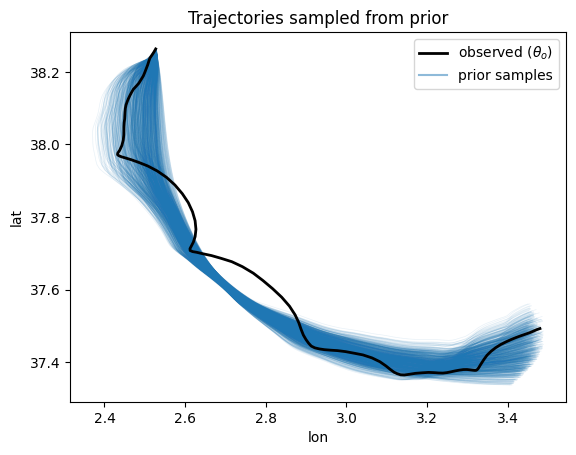

In [32]:
fig = plt.figure()
ax = fig.add_subplot()
for tj in sim_trajectories:
    ax.plot(tj[:, 0], tj[:, 1], color="C0", alpha=0.1, linewidth=0.5)
ax.plot(traj_ds.lon, traj_ds.lat, color="k", linewidth=2, label=r"observed ($\theta_o$)")
ax.plot([], [], color="C0", alpha=0.5, label="prior samples")
ax.set_xlabel("lon")
ax.set_ylabel("lat")
ax.set_title("Trajectories sampled from prior")
ax.legend()


In [20]:
sim_trajectories.shape

(1000, 120, 2)